<a href="https://colab.research.google.com/github/YeweiYuan/Iot-Security-Project/blob/master/MLforUDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **UDP Traffic**


# **Data Preprocessing**

---

In [5]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
import pandas as pd
dataPath = "/content/drive/My Drive/LINUX"
dataName = "/CAMONLY/CAMONLY_NORMAL_00001_20200725232935udp.csv"
camonly = pd.read_csv(dataPath+dataName)
camonly.describe()

,time,ip_len,ip_id,ip_ttl,ip_chksum,udp_sport,udp_dport,udp_len,udp_chksum,device
count,3.552000e+03,3552.000000,3552.000000,3552.000000,3552.000000,3552.000000,3552.000000,3552.000000,3552.000000,3552.000000
mean,1.595726e+09,44.382883,31781.170327,48.067005,32569.380912,32026.037725,46603.349099,24.382883,33341.011824,3.903716
std,5.763820e+03,6.610865,18923.596682,9.947851,18774.443004,2821.981224,8139.624073,6.610865,17830.272863,3.163394
min,1.595716e+09,32.000000,15.000000,40.000000,6.000000,2918.000000,32788.000000,12.000000,234.000000,1.000000
25%,1.595721e+09,36.000000,15430.750000,44.000000,16073.500000,32100.000000,39556.000000,16.000000,19622.000000,1.000000
50%,1.595726e+09,48.000000,31114.500000,47.000000,32553.000000,32100.000000,48475.000000,28.000000,33387.000000,2.000000
75%,1.595731e+09,48.000000,48223.500000,51.000000,48842.750000,32100.000000,53427.000000,28.000000,48697.000000,8.000000
max,1.595736e+09,64.000000,65476.000000,114.000000,65513.000000,60839.000000,60877.000000,44.000000,65512.000000,12.000000


In [62]:
camonly['time'].std()

5763.819835430446

In [63]:
def add_features(df):
  for interval in [0.1,0.5,1.5,5]:

    td = pd.Series([0]*len(df))
    tsd = pd.Series([0]*len(df))
    iplmn = pd.Series([0]*len(df))
    iplsd = pd.Series([0]*len(df))
    udplmn = pd.Series([0]*len(df))
    udplsd = pd.Series([0]*len(df))    
    for device in set(df["device"]):
      print("device", device, "begins.bm")
      ds = df[df["device"] == device]
      times = []
      timestds = []
      iplmeans = []
      iplstds = []
      udplmeans = []
      udplstds = []
      for row in ds.itertuples():
        bf = ds[(ds["time"]-getattr(row, "time") >= -interval)&(ds["time"]-getattr(row, "time") <= 0)]
        times.append(bf['time'].count())  
        timestds.append(bf['time'].std())  
        iplmeans.append(bf['ip_len'].mean())
        iplstds.append(bf['ip_len'].std())
        udplmeans.append(bf['udp_len'].mean())
        udplstds.append(bf['udp_len'].std())
      td[ds.index] = times
      tsd[ds.index] = timestds
      iplmn[ds.index] = iplmeans
      iplsd[ds.index] = iplstds
      udplmn[ds.index] = udplmeans
      udplsd[ds.index] = udplstds
    df["time_density_before_%0.1f" %interval] = td
    df["time_std_before_%0.1f" %interval] = tsd
    df["iplen_mean_before_%0.1f" %interval] = iplmn
    df["iplen_std_before_%0.1f" %interval] = iplsd
    df["udplen_mean_before_%0.1f" %interval] = udplmn
    df["udplen_std_before_%0.1f" %interval] = udplsd
    df = df.fillna(0)
  return df

In [64]:
import time

time_start=time.time()
camonly = add_features(camonly)
time_end=time.time()
print('time cost',time_end-time_start,'s')

device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 5 begins.bm
device 6 begins.bm
device 7 begins.bm
device 8 begins.bm
device 9 begins.bm
device 10 begins.bm
device 11 begins.bm
device 12 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 5 begins.bm
device 6 begins.bm
device 7 begins.bm
device 8 begins.bm
device 9 begins.bm
device 10 begins.bm
device 11 begins.bm
device 12 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 5 begins.bm
device 6 begins.bm
device 7 begins.bm
device 8 begins.bm
device 9 begins.bm
device 10 begins.bm
device 11 begins.bm
device 12 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 5 begins.bm
device 6 begins.bm
device 7 begins.bm
device 8 begins.bm
device 9 begins.bm
device 10 begins.bm
device 11 begins.bm
device 12 begins.bm
time cost 28.685854196548462 s


In [65]:
camonly[camonly["device"] == 3]

,time,eth_dst,eth_src,ip_len,ip_id,ip_flags,ip_ttl,ip_chksum,ip_src,ip_dst,udp_sport,udp_dport,udp_len,udp_chksum,load,device,time_density_before_0.1,time_std_before_0.1,iplen_mean_before_0.1,iplen_std_before_0.1,udplen_mean_before_0.1,udplen_std_before_0.1,time_density_before_0.5,time_std_before_0.5,iplen_mean_before_0.5,iplen_std_before_0.5,udplen_mean_before_0.5,udplen_std_before_0.5,time_density_before_1.5,time_std_before_1.5,iplen_mean_before_1.5,iplen_std_before_1.5,udplen_mean_before_1.5,udplen_std_before_1.5,time_density_before_5.0,time_std_before_5.0,iplen_mean_before_5.0,iplen_std_before_5.0,udplen_mean_before_5.0,udplen_std_before_5.0
425,1.595718e+09,7c:a7:b0:b8:68:7a,ac:e0:10:16:d0:7f,32,6541,DF,40,24255,61.158.146.163,10.42.0.22,2918,38604,12,37297,b'\xf1p\x00\x00',3,1,0.000000,32.0,0.0,12.0,0.0,1,0.000000,32.0,0.0,12.0,0.0,1,0.000000,32.0,0.0,12.0,0.0,1,0.000000,32.0,0.0,12.0,0.0
426,1.595718e+09,7c:a7:b0:b8:68:7a,ac:e0:10:16:d0:7f,32,6542,DF,40,24254,61.158.146.163,10.42.0.22,2918,38604,12,37297,b'\xf1p\x00\x00',3,2,0.001570,32.0,0.0,12.0,0.0,2,0.001570,32.0,0.0,12.0,0.0,2,0.001570,32.0,0.0,12.0,0.0,2,0.001570,32.0,0.0,12.0,0.0
427,1.595718e+09,7c:a7:b0:b8:68:7a,ac:e0:10:16:d0:7f,32,6580,DF,40,24216,61.158.146.163,10.42.0.22,2918,38604,12,37295,b'\xf1r\x00\x00',3,1,0.000000,32.0,0.0,12.0,0.0,1,0.000000,32.0,0.0,12.0,0.0,1,0.000000,32.0,0.0,12.0,0.0,3,1.034118,32.0,0.0,12.0,0.0
428,1.595718e+09,7c:a7:b0:b8:68:7a,ac:e0:10:16:d0:7f,32,6581,DF,40,24215,61.158.146.163,10.42.0.22,2918,38604,12,37295,b'\xf1r\x00\x00',3,2,0.014299,32.0,0.0,12.0,0.0,2,0.014299,32.0,0.0,12.0,0.0,2,0.014299,32.0,0.0,12.0,0.0,4,1.039988,32.0,0.0,12.0,0.0
429,1.595718e+09,7c:a7:b0:b8:68:7a,ac:e0:10:16:d0:7f,32,6589,DF,40,24207,61.158.146.163,10.42.0.22,2918,38604,12,37295,b'\xf1r\x00\x00',3,1,0.000000,32.0,0.0,12.0,0.0,3,0.156139,32.0,0.0,12.0,0.0,3,0.156139,32.0,0.0,12.0,0.0,5,1.041727,32.0,0.0,12.0,0.0
430,1.595718e+09,7c:a7:b0:b8:68:7a,ac:e0:10:16:d0:7f,32,6590,DF,40,24206,61.158.146.163,10.42.0.22,2918,38604,12,37295,b'\xf1r\x00\x00',3,2,0.028106,32.0,0.0,12.0,0.0,4,0.168273,32.0,0.0,12.0,0.0,4,0.168273,32.0,0.0,12.0,0.0,6,1.013394,32.0,0.0,12.0,0.0


In [69]:
dataName0 = "/CAMPC/CAMPC_CONNECT_30MINudp.csv"
dataName1 = "/CAMPC/CAMPC_NORMAL_00002_20200724013000udp.csv"
dataName2 = "/CAMPC/CAMPC_NORMAL_00003_20200724020000udp.csv"
campc0 = pd.read_csv(dataPath+dataName0)
campc1 = pd.read_csv(dataPath+dataName1)
campc2 = pd.read_csv(dataPath+dataName2)

In [70]:
time_start = time.time()
campc0 = add_features(campc0)
time_end=time.time()
print('time cost',time_end-time_start,'s')

device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 5 begins.bm
device 6 begins.bm
device 7 begins.bm
device 8 begins.bm
device 9 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 5 begins.bm
device 6 begins.bm
device 7 begins.bm
device 8 begins.bm
device 9 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 5 begins.bm
device 6 begins.bm
device 7 begins.bm
device 8 begins.bm
device 9 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 5 begins.bm
device 6 begins.bm
device 7 begins.bm
device 8 begins.bm
device 9 begins.bm
time cost 382.0376806259155 s


In [71]:
campc1 = add_features(campc1)

device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm


In [72]:
campc2 = add_features(campc2)

device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm


In [73]:
campc = pd.concat([campc0, campc1, campc2])
campc.describe()

,time,ip_len,ip_id,ip_ttl,ip_chksum,udp_sport,udp_dport,udp_len,udp_chksum,device,time_density_before_0.1,time_std_before_0.1,iplen_mean_before_0.1,iplen_std_before_0.1,udplen_mean_before_0.1,udplen_std_before_0.1,time_density_before_0.5,time_std_before_0.5,iplen_mean_before_0.5,iplen_std_before_0.5,udplen_mean_before_0.5,udplen_std_before_0.5,time_density_before_1.5,time_std_before_1.5,iplen_mean_before_1.5,iplen_std_before_1.5,udplen_mean_before_1.5,udplen_std_before_1.5,time_density_before_5.0,time_std_before_5.0,iplen_mean_before_5.0,iplen_std_before_5.0,udplen_mean_before_5.0,udplen_std_before_5.0
count,1.794210e+05,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000,179421.000000
mean,1.595551e+09,38.894265,6463.965606,38.033870,29647.066999,41308.223775,54090.913037,18.894265,35186.336661,2.275893,4.214830,0.036439,38.953382,3.658900,18.953382,3.658900,17.747755,0.151618,38.893790,5.063020,18.893790,5.063020,52.065756,0.439547,38.897496,5.709302,18.897496,5.709302,172.042648,1.444562,38.914669,6.198394,18.914669,6.198394
std,2.367251e+03,6.892890,15518.217946,3.680886,8650.998390,3837.674197,2285.635675,6.892890,20365.553003,1.140014,1.381399,0.009444,3.306419,5.385559,3.306419,5.385559,3.682285,0.014110,1.873177,4.485604,1.873177,4.485604,9.632627,0.032308,1.335510,3.591173,1.335510,3.591173,31.039945,0.100781,1.162453,3.568795,1.162453,3.568795
min,1.595546e+09,32.000000,0.000000,36.000000,0.000000,12255.000000,33453.000000,12.000000,0.000000,1.000000,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000
25%,1.595551e+09,38.000000,0.000000,36.000000,28858.000000,43504.000000,54205.000000,18.000000,16110.000000,2.000000,3.000000,0.032023,37.333333,1.154701,17.333333,1.154701,16.000000,0.145450,37.894737,2.676174,17.894737,2.676174,48.000000,0.430291,38.290909,3.110515,18.290909,3.110515,159.000000,1.435310,38.491803,5.487546,18.491803,5.487546
50%,1.595552e+09,38.000000,0.000000,36.000000,28860.000000,43504.000000,54205.000000,18.000000,39571.000000,2.000000,4.000000,0.036997,38.400000,3.000000,18.400000,3.000000,18.000000,0.152228,38.421053,3.128974,18.421053,3.128974,55.000000,0.441039,38.745763,3.765875,18.745763,3.765875,182.000000,1.451002,38.914286,6.036676,18.914286,6.036676
75%,1.595553e+09,40.000000,0.000000,36.000000,28860.000000,43504.000000,54205.000000,20.000000,53719.000000,2.000000,5.000000,0.041179,39.333333,3.785939,19.333333,3.785939,20.000000,0.158929,39.714286,4.407785,19.714286,4.407785,59.000000,0.451958,39.428571,8.331252,19.428571,8.331252,195.000000,1.467362,39.256039,7.133053,19.256039,7.133053
max,1.595554e+09,748.000000,65532.000000,51.000000,65533.000000,60844.000000,58830.000000,728.000000,65535.000000,9.000000,25.000000,0.070706,390.000000,506.288455,370.000000,506.288455,35.000000,0.243071,220.571429,319.544676,200.571429,319.544676,72.000000,0.552299,125.111111,193.962061,105.111111,193.962061,219.000000,3.527651,101.600000,179.088486,81.600000,179.088486


In [74]:
dataName3 = "/COMHIPRO/CAMHIPRO_CONNECTONLY_00001_20200725194622udp.csv"
dataName4 = "/COMHIPRO/CAMHIPRO_CONNECTONLY_00002_20200725200000udp.csv"
dataName5 = "/COMHIPRO/CAMHIPRO_CONNECTONLY_00003_20200725203000udp.csv"
dataName6 = "/COMHIPRO/CAMHIPRO_VIDEO_00001_20200725210311udp.csv"
dataName7 = "/COMHIPRO/CAMHIPRO_VIDEO_00002_20200725213000udp.csv"
camhip1 = pd.read_csv(dataPath+dataName3)
camhip2 = pd.read_csv(dataPath+dataName4)
camhip3 = pd.read_csv(dataPath+dataName5)
camhip4 = pd.read_csv(dataPath+dataName6)
camhip5 = pd.read_csv(dataPath+dataName7)

In [75]:
camhip1 = add_features(camhip1)

device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm


In [76]:
camhip2 = add_features(camhip2)

device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm


In [77]:
camhip3 = add_features(camhip3)

device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm


In [78]:
camhip4 = add_features(camhip4)

device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm


In [79]:
camhip5 = add_features(camhip5)

device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm
device 1 begins.bm
device 2 begins.bm
device 3 begins.bm
device 4 begins.bm


In [80]:
camhip = pd.concat([camhip1, camhip2, camhip3, camhip4, camhip5])
camhip.describe()

,time,ip_len,ip_id,ip_ttl,ip_chksum,udp_sport,udp_dport,udp_len,udp_chksum,device,time_density_before_0.1,time_std_before_0.1,iplen_mean_before_0.1,iplen_std_before_0.1,udplen_mean_before_0.1,udplen_std_before_0.1,time_density_before_0.5,time_std_before_0.5,iplen_mean_before_0.5,iplen_std_before_0.5,udplen_mean_before_0.5,udplen_std_before_0.5,time_density_before_1.5,time_std_before_1.5,iplen_mean_before_1.5,iplen_std_before_1.5,udplen_mean_before_1.5,udplen_std_before_1.5,time_density_before_5.0,time_std_before_5.0,iplen_mean_before_5.0,iplen_std_before_5.0,udplen_mean_before_5.0,udplen_std_before_5.0
count,8.747600e+04,87476.000000,87476.000000,87476.000000,87476.000000,87476.000000,87476.000000,87476.000000,87476.00000,87476.000000,87476.000000,87476.000000,87476.000000,87476.000000,87476.000000,87476.000000,87476.000000,87476.000000,87476.000000,87476.000000,87476.000000,87476.000000,87476.000000,87476.000000,87476.000000,87476.000000,87476.000000,87476.000000,87476.000000,87476.000000,87476.000000,87476.000000,87476.000000,87476.000000
mean,1.595708e+09,38.066510,32559.076833,62.851411,32809.103606,40709.635249,49682.532843,18.066510,43408.29320,1.102131,2.701724,0.028729,38.347801,4.144038,18.347801,4.144038,8.800848,0.166167,38.012259,5.387996,18.012259,5.387996,24.604349,0.454145,38.027563,6.172861,18.027563,6.172861,80.471135,1.455481,38.100334,6.461716,18.100334,6.461716
std,2.034724e+03,8.760759,18958.948454,1.591096,18874.309653,826.625292,843.320871,8.760759,18468.97113,0.448905,1.848548,0.022245,6.559114,6.967680,6.559114,6.967680,4.526498,0.034770,4.118979,5.835209,4.118979,5.835209,10.641657,0.057618,3.673461,5.352048,3.673461,5.352048,33.259633,0.160075,3.600748,5.357039,3.600748,5.357039
min,1.595703e+09,32.000000,0.000000,41.000000,0.000000,32100.000000,32799.000000,12.000000,2.00000,1.000000,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000
25%,1.595707e+09,32.000000,15372.750000,63.000000,16314.000000,40789.000000,49694.000000,12.000000,29687.00000,1.000000,2.000000,0.000028,34.000000,0.000000,14.000000,0.000000,7.000000,0.149546,36.888889,3.023716,16.888889,3.023716,22.000000,0.431060,37.217391,3.536656,17.217391,3.536656,85.000000,1.418241,38.727273,5.051788,18.727273,5.051788
50%,1.595709e+09,40.000000,32622.500000,63.000000,33231.000000,40789.000000,49694.000000,20.000000,55686.00000,1.000000,2.000000,0.031605,37.333333,3.464102,17.333333,3.464102,9.000000,0.164204,37.750000,4.000000,17.750000,4.000000,27.000000,0.459477,39.419355,6.005289,19.419355,6.005289,95.000000,1.476988,39.607843,8.290191,19.607843,8.290191
75%,1.595710e+09,40.000000,49004.000000,63.000000,49131.250000,40789.000000,49694.000000,20.000000,57489.00000,1.000000,3.000000,0.046163,40.000000,5.656854,20.000000,5.656854,11.000000,0.177668,41.500000,6.513047,21.500000,6.513047,33.000000,0.481796,40.551724,10.032005,20.551724,10.032005,102.000000,1.511867,40.092593,8.787678,20.092593,8.787678
max,1.595711e+09,748.000000,65535.000000,63.000000,65533.000000,40789.000000,60139.000000,728.000000,65534.00000,4.000000,12.000000,0.070705,748.000000,506.288455,728.000000,506.288455,29.000000,0.351891,138.571429,258.332438,118.571429,258.332438,54.000000,0.876192,129.375000,241.666126,109.375000,241.666126,145.000000,1.728067,129.375000,241.666126,109.375000,241.666126


In [81]:
cap = pd.concat([camonly, campc, camhip])
cap.describe()

,time,ip_len,ip_id,ip_ttl,ip_chksum,udp_sport,udp_dport,udp_len,udp_chksum,device,time_density_before_0.1,time_std_before_0.1,iplen_mean_before_0.1,iplen_std_before_0.1,udplen_mean_before_0.1,udplen_std_before_0.1,time_density_before_0.5,time_std_before_0.5,iplen_mean_before_0.5,iplen_std_before_0.5,udplen_mean_before_0.5,udplen_std_before_0.5,time_density_before_1.5,time_std_before_1.5,iplen_mean_before_1.5,iplen_std_before_1.5,udplen_mean_before_1.5,udplen_std_before_1.5,time_density_before_5.0,time_std_before_5.0,iplen_mean_before_5.0,iplen_std_before_5.0,udplen_mean_before_5.0,udplen_std_before_5.0
count,2.704490e+05,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000
mean,1.595604e+09,38.698616,15236.867931,46.192809,30708.200053,40992.702347,52566.694819,18.698616,37821.470370,1.917622,3.688115,0.033480,38.852978,3.802401,18.852978,3.802401,14.642469,0.154710,38.701079,5.141534,18.701079,5.141534,42.522953,0.439587,38.707141,5.825545,18.707141,5.825545,140.189319,1.431804,38.741864,6.245242,18.741864,6.245242
std,7.459414e+04,7.582728,20794.961297,12.044733,13104.277777,3353.230232,3043.786975,7.582728,20115.283793,1.187786,1.716249,0.015696,4.715594,5.934337,4.715594,5.934337,5.940869,0.029239,2.987505,4.965382,2.987505,4.965382,16.860842,0.063767,2.572513,4.263990,2.572513,4.263990,55.451458,0.196239,2.475071,4.252248,2.475071,4.252248
min,1.595546e+09,32.000000,0.000000,36.000000,0.000000,2918.000000,32788.000000,12.000000,0.000000,1.000000,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000
25%,1.595551e+09,38.000000,0.000000,36.000000,28852.000000,40789.000000,49694.000000,18.000000,19671.000000,1.000000,2.000000,0.028445,37.000000,1.000000,17.000000,1.000000,10.000000,0.145744,37.666667,2.669047,17.666667,2.669047,32.000000,0.429787,38.186047,3.111551,18.186047,3.111551,101.000000,1.431884,38.512397,5.437295,18.512397,5.437295
50%,1.595553e+09,38.000000,0.000000,41.000000,28860.000000,40789.000000,54205.000000,18.000000,43578.000000,2.000000,4.000000,0.036229,38.333333,3.000000,18.333333,3.000000,16.000000,0.154255,38.333333,3.464102,18.333333,3.464102,47.000000,0.443637,38.968750,5.765534,18.968750,5.765534,152.000000,1.453409,39.032609,6.602940,19.032609,6.602940
75%,1.595708e+09,40.000000,30499.000000,63.000000,31160.000000,43504.000000,54205.000000,20.000000,57488.000000,2.000000,5.000000,0.042127,40.000000,4.320494,20.000000,4.320494,19.000000,0.163840,40.363636,6.024194,20.363636,6.024194,57.000000,0.459617,39.714286,9.178780,19.714286,9.178780,186.000000,1.478482,39.519231,7.902047,19.519231,7.902047
max,1.595736e+09,748.000000,65535.000000,114.000000,65533.000000,60844.000000,60877.000000,728.000000,65535.000000,12.000000,25.000000,0.070706,748.000000,506.288455,728.000000,506.288455,35.000000,0.351891,220.571429,319.544676,200.571429,319.544676,72.000000,0.976860,129.375000,241.666126,109.375000,241.666126,219.000000,3.527651,129.375000,241.666126,109.375000,241.666126


In [82]:
cap.groupby('ip_src').count()

,time,eth_dst,eth_src,ip_len,ip_id,ip_flags,ip_ttl,ip_chksum,ip_dst,udp_sport,udp_dport,udp_len,udp_chksum,load,device,time_density_before_0.1,time_std_before_0.1,iplen_mean_before_0.1,iplen_std_before_0.1,udplen_mean_before_0.1,udplen_std_before_0.1,time_density_before_0.5,time_std_before_0.5,iplen_mean_before_0.5,iplen_std_before_0.5,udplen_mean_before_0.5,udplen_std_before_0.5,time_density_before_1.5,time_std_before_1.5,iplen_mean_before_1.5,iplen_std_before_1.5,udplen_mean_before_1.5,udplen_std_before_1.5,time_density_before_5.0,time_std_before_5.0,iplen_mean_before_5.0,iplen_std_before_5.0,udplen_mean_before_5.0,udplen_std_before_5.0
ip_src,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
101.27.31.167,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
106.165.63.227,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
110.86.119.15,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
112.247.4.160,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
113.24.59.167,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445
116.249.117.82,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24
118.181.46.144,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
121.11.118.143,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
124.122.230.152,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6


In [83]:
capip = cap.groupby('ip_src').count()
nsources = capip[capip['time']>30].index.tolist()
nsources

['113.24.59.167',
 '192.168.1.7',
 '47.254.36.28',
 '47.52.252.114',
 '47.93.129.21',
 '58.101.161.102',
 '95.223.117.243']

In [ ]:
#cap["device"] = [0]*len(cap)
#sources = list(set(cap["ip_src"]))
#sources

['101.27.31.167',
 '112.247.4.160',
 '192.168.1.7',
 '222.212.5.39',
 '110.86.119.15',
 '47.254.36.28',
 '36.62.78.208',
 '106.165.63.227',
 '124.122.230.152',
 '58.101.161.102',
 '61.158.146.163',
 '116.249.117.82',
 '47.93.129.21',
 '47.52.252.114']

In [84]:
cap["device"] = [0]*len(cap)
dp = 1
for nsource in nsources:
  cap['device'] += cap["ip_src"].apply(lambda x: dp if x == nsource else 0)
  dp += 1
cap.describe()

,time,ip_len,ip_id,ip_ttl,ip_chksum,udp_sport,udp_dport,udp_len,udp_chksum,device,time_density_before_0.1,time_std_before_0.1,iplen_mean_before_0.1,iplen_std_before_0.1,udplen_mean_before_0.1,udplen_std_before_0.1,time_density_before_0.5,time_std_before_0.5,iplen_mean_before_0.5,iplen_std_before_0.5,udplen_mean_before_0.5,udplen_std_before_0.5,time_density_before_1.5,time_std_before_1.5,iplen_mean_before_1.5,iplen_std_before_1.5,udplen_mean_before_1.5,udplen_std_before_1.5,time_density_before_5.0,time_std_before_5.0,iplen_mean_before_5.0,iplen_std_before_5.0,udplen_mean_before_5.0,udplen_std_before_5.0
count,2.704490e+05,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000
mean,1.595604e+09,38.698616,15236.867931,46.192809,30708.200053,40992.702347,52566.694819,18.698616,37821.470370,4.077131,3.688115,0.033480,38.852978,3.802401,18.852978,3.802401,14.642469,0.154710,38.701079,5.141534,18.701079,5.141534,42.522953,0.439587,38.707141,5.825545,18.707141,5.825545,140.189319,1.431804,38.741864,6.245242,18.741864,6.245242
std,7.459414e+04,7.582728,20794.961297,12.044733,13104.277777,3353.230232,3043.786975,7.582728,20115.283793,2.181006,1.716249,0.015696,4.715594,5.934337,4.715594,5.934337,5.940869,0.029239,2.987505,4.965382,2.987505,4.965382,16.860842,0.063767,2.572513,4.263990,2.572513,4.263990,55.451458,0.196239,2.475071,4.252248,2.475071,4.252248
min,1.595546e+09,32.000000,0.000000,36.000000,0.000000,2918.000000,32788.000000,12.000000,0.000000,0.000000,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000
25%,1.595551e+09,38.000000,0.000000,36.000000,28852.000000,40789.000000,49694.000000,18.000000,19671.000000,2.000000,2.000000,0.028445,37.000000,1.000000,17.000000,1.000000,10.000000,0.145744,37.666667,2.669047,17.666667,2.669047,32.000000,0.429787,38.186047,3.111551,18.186047,3.111551,101.000000,1.431884,38.512397,5.437295,18.512397,5.437295
50%,1.595553e+09,38.000000,0.000000,41.000000,28860.000000,40789.000000,54205.000000,18.000000,43578.000000,6.000000,4.000000,0.036229,38.333333,3.000000,18.333333,3.000000,16.000000,0.154255,38.333333,3.464102,18.333333,3.464102,47.000000,0.443637,38.968750,5.765534,18.968750,5.765534,152.000000,1.453409,39.032609,6.602940,19.032609,6.602940
75%,1.595708e+09,40.000000,30499.000000,63.000000,31160.000000,43504.000000,54205.000000,20.000000,57488.000000,6.000000,5.000000,0.042127,40.000000,4.320494,20.000000,4.320494,19.000000,0.163840,40.363636,6.024194,20.363636,6.024194,57.000000,0.459617,39.714286,9.178780,19.714286,9.178780,186.000000,1.478482,39.519231,7.902047,19.519231,7.902047
max,1.595736e+09,748.000000,65535.000000,114.000000,65533.000000,60844.000000,60877.000000,728.000000,65535.000000,7.000000,25.000000,0.070706,748.000000,506.288455,728.000000,506.288455,35.000000,0.351891,220.571429,319.544676,200.571429,319.544676,72.000000,0.976860,129.375000,241.666126,109.375000,241.666126,219.000000,3.527651,129.375000,241.666126,109.375000,241.666126


In [85]:
cap.groupby('device').count()

,time,eth_dst,eth_src,ip_len,ip_id,ip_flags,ip_ttl,ip_chksum,ip_src,ip_dst,udp_sport,udp_dport,udp_len,udp_chksum,load,time_density_before_0.1,time_std_before_0.1,iplen_mean_before_0.1,iplen_std_before_0.1,udplen_mean_before_0.1,udplen_std_before_0.1,time_density_before_0.5,time_std_before_0.5,iplen_mean_before_0.5,iplen_std_before_0.5,udplen_mean_before_0.5,udplen_std_before_0.5,time_density_before_1.5,time_std_before_1.5,iplen_mean_before_1.5,iplen_std_before_1.5,udplen_mean_before_1.5,udplen_std_before_1.5,time_density_before_5.0,time_std_before_5.0,iplen_mean_before_5.0,iplen_std_before_5.0,udplen_mean_before_5.0,udplen_std_before_5.0
device,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140
1,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445,34445
2,86677,86677,86677,86677,86677,86677,86677,86677,86677,86677,86677,86677,86677,86677,86677,86677,86677,86677,86677,86677,86677,86677,86677,86677,86677,86677,86677,86677,86677,86677,86677,86677,86677,86677,86677,86677,86677,86677,86677
3,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711
4,1714,1714,1714,1714,1714,1714,1714,1714,1714,1714,1714,1714,1714,1714,1714,1714,1714,1714,1714,1714,1714,1714,1714,1714,1714,1714,1714,1714,1714,1714,1714,1714,1714,1714,1714,1714,1714,1714,1714
5,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440
6,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586,134586
7,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736


In [ ]:
import pandas as pd

cap = pd.read_csv('/content/drive/My Drive/LINUX/udpcaptime.csv')

In [86]:
#data = cap[['device', 'udp_len']]
data = cap[['device', 'ip_len', 'udp_len','time_density_before_0.1',	'time_std_before_0.1',	'iplen_mean_before_0.1',	'iplen_std_before_0.1',	'udplen_mean_before_0.1',	'udplen_std_before_0.1',	'time_density_before_0.5',	'time_std_before_0.5',	'iplen_mean_before_0.5',	'iplen_std_before_0.5',	'udplen_mean_before_0.5',	'udplen_std_before_0.5',	'time_density_before_1.5',	'time_std_before_1.5',	'iplen_mean_before_1.5',	'iplen_std_before_1.5',	'udplen_mean_before_1.5',	'udplen_std_before_1.5',	'time_density_before_5.0',	'time_std_before_5.0',	'iplen_mean_before_5.0',	'iplen_std_before_5.0',	'udplen_mean_before_5.0',	'udplen_std_before_5.0']]
#data = cap[['device', 'ip_len', 'ip_ttl', 'udp_len']]
data.head()

,device,ip_len,udp_len,time_density_before_0.1,time_std_before_0.1,iplen_mean_before_0.1,iplen_std_before_0.1,udplen_mean_before_0.1,udplen_std_before_0.1,time_density_before_0.5,time_std_before_0.5,iplen_mean_before_0.5,iplen_std_before_0.5,udplen_mean_before_0.5,udplen_std_before_0.5,time_density_before_1.5,time_std_before_1.5,iplen_mean_before_1.5,iplen_std_before_1.5,udplen_mean_before_1.5,udplen_std_before_1.5,time_density_before_5.0,time_std_before_5.0,iplen_mean_before_5.0,iplen_std_before_5.0,udplen_mean_before_5.0,udplen_std_before_5.0
0,3,48,28,1,0.000000,48.0,0.000000,28.0,0.000000,1,0.000000,48.0,0.000000,28.0,0.000000,1,0.000000,48.0,0.000000,28.0,0.000000,1,0.000000,48.0,0.000000,28.0,0.000000
1,3,36,16,2,0.001593,42.0,8.485281,22.0,8.485281,2,0.001593,42.0,8.485281,22.0,8.485281,2,0.001593,42.0,8.485281,22.0,8.485281,2,0.001593,42.0,8.485281,22.0,8.485281
2,5,48,28,1,0.000000,48.0,0.000000,28.0,0.000000,1,0.000000,48.0,0.000000,28.0,0.000000,1,0.000000,48.0,0.000000,28.0,0.000000,1,0.000000,48.0,0.000000,28.0,0.000000
3,5,36,16,2,0.001407,42.0,8.485281,22.0,8.485281,2,0.001407,42.0,8.485281,22.0,8.485281,2,0.001407,42.0,8.485281,22.0,8.485281,2,0.001407,42.0,8.485281,22.0,8.485281
4,4,48,28,1,0.000000,48.0,0.000000,28.0,0.000000,1,0.000000,48.0,0.000000,28.0,0.000000,1,0.000000,48.0,0.000000,28.0,0.000000,1,0.000000,48.0,0.000000,28.0,0.000000


In [87]:
def bin(x):
  digits = str('{0:016b}'.format(x))
  return digits

In [88]:
#data = data.join(pd.DataFrame(cap["ip_chksum"].apply(bin).astype(str).str.findall(".").values.tolist()).add_prefix('ip_chksum'))
data = data.join(pd.DataFrame(cap["udp_chksum"].apply(bin).astype(str).str.findall(".").values.tolist()).add_prefix('udp_chksum'))
data.head()

,device,ip_len,udp_len,time_density_before_0.1,time_std_before_0.1,iplen_mean_before_0.1,iplen_std_before_0.1,udplen_mean_before_0.1,udplen_std_before_0.1,time_density_before_0.5,time_std_before_0.5,iplen_mean_before_0.5,iplen_std_before_0.5,udplen_mean_before_0.5,udplen_std_before_0.5,time_density_before_1.5,time_std_before_1.5,iplen_mean_before_1.5,iplen_std_before_1.5,udplen_mean_before_1.5,udplen_std_before_1.5,time_density_before_5.0,time_std_before_5.0,iplen_mean_before_5.0,iplen_std_before_5.0,udplen_mean_before_5.0,udplen_std_before_5.0,udp_chksum0,udp_chksum1,udp_chksum2,udp_chksum3,udp_chksum4,udp_chksum5,udp_chksum6,udp_chksum7,udp_chksum8,udp_chksum9,udp_chksum10,udp_chksum11,udp_chksum12,udp_chksum13,udp_chksum14,udp_chksum15
0,3,48,28,1,0.0,48.0,0.0,28.0,0.0,1,0.0,48.0,0.0,28.0,0.0,1,0.0,48.0,0.0,28.0,0.0,1,0.0,48.0,0.0,28.0,0.0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0
0,3,48,28,1,0.0,48.0,0.0,28.0,0.0,1,0.0,48.0,0.0,28.0,0.0,1,0.0,48.0,0.0,28.0,0.0,1,0.0,48.0,0.0,28.0,0.0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0
0,6,38,18,1,0.0,38.0,0.0,18.0,0.0,1,0.0,38.0,0.0,18.0,0.0,1,0.0,38.0,0.0,18.0,0.0,1,0.0,38.0,0.0,18.0,0.0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0
0,6,38,18,1,0.0,38.0,0.0,18.0,0.0,1,0.0,38.0,0.0,18.0,0.0,1,0.0,38.0,0.0,18.0,0.0,1,0.0,38.0,0.0,18.0,0.0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0
0,3,48,28,1,0.0,48.0,0.0,28.0,0.0,1,0.0,48.0,0.0,28.0,0.0,1,0.0,48.0,0.0,28.0,0.0,1,0.0,48.0,0.0,28.0,0.0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0


In [89]:
data = data.reset_index(drop=True)

In [90]:
data.describe()

,device,ip_len,udp_len,time_density_before_0.1,time_std_before_0.1,iplen_mean_before_0.1,iplen_std_before_0.1,udplen_mean_before_0.1,udplen_std_before_0.1,time_density_before_0.5,time_std_before_0.5,iplen_mean_before_0.5,iplen_std_before_0.5,udplen_mean_before_0.5,udplen_std_before_0.5,time_density_before_1.5,time_std_before_1.5,iplen_mean_before_1.5,iplen_std_before_1.5,udplen_mean_before_1.5,udplen_std_before_1.5,time_density_before_5.0,time_std_before_5.0,iplen_mean_before_5.0,iplen_std_before_5.0,udplen_mean_before_5.0,udplen_std_before_5.0
count,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000
mean,4.077131,38.698616,18.698616,3.688115,0.033480,38.852978,3.802401,18.852978,3.802401,14.642469,0.154710,38.701079,5.141534,18.701079,5.141534,42.522953,0.439587,38.707141,5.825545,18.707141,5.825545,140.189319,1.431804,38.741864,6.245242,18.741864,6.245242
std,2.181006,7.582728,7.582728,1.716249,0.015696,4.715594,5.934337,4.715594,5.934337,5.940869,0.029239,2.987505,4.965382,2.987505,4.965382,16.860842,0.063767,2.572513,4.263990,2.572513,4.263990,55.451458,0.196239,2.475071,4.252248,2.475071,4.252248
min,0.000000,32.000000,12.000000,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000
25%,2.000000,38.000000,18.000000,2.000000,0.028445,37.000000,1.000000,17.000000,1.000000,10.000000,0.145744,37.666667,2.669047,17.666667,2.669047,32.000000,0.429787,38.186047,3.111551,18.186047,3.111551,101.000000,1.431884,38.512397,5.437295,18.512397,5.437295
50%,6.000000,38.000000,18.000000,4.000000,0.036229,38.333333,3.000000,18.333333,3.000000,16.000000,0.154255,38.333333,3.464102,18.333333,3.464102,47.000000,0.443637,38.968750,5.765534,18.968750,5.765534,152.000000,1.453409,39.032609,6.602940,19.032609,6.602940
75%,6.000000,40.000000,20.000000,5.000000,0.042127,40.000000,4.320494,20.000000,4.320494,19.000000,0.163840,40.363636,6.024194,20.363636,6.024194,57.000000,0.459617,39.714286,9.178780,19.714286,9.178780,186.000000,1.478482,39.519231,7.902047,19.519231,7.902047
max,7.000000,748.000000,728.000000,25.000000,0.070706,748.000000,506.288455,728.000000,506.288455,35.000000,0.351891,220.571429,319.544676,200.571429,319.544676,72.000000,0.976860,129.375000,241.666126,109.375000,241.666126,219.000000,3.527651,129.375000,241.666126,109.375000,241.666126


In [91]:
data = data.astype(int)
data.describe()

,device,ip_len,udp_len,time_density_before_0.1,time_std_before_0.1,iplen_mean_before_0.1,iplen_std_before_0.1,udplen_mean_before_0.1,udplen_std_before_0.1,time_density_before_0.5,time_std_before_0.5,iplen_mean_before_0.5,iplen_std_before_0.5,udplen_mean_before_0.5,udplen_std_before_0.5,time_density_before_1.5,time_std_before_1.5,iplen_mean_before_1.5,iplen_std_before_1.5,udplen_mean_before_1.5,udplen_std_before_1.5,time_density_before_5.0,time_std_before_5.0,iplen_mean_before_5.0,iplen_std_before_5.0,udplen_mean_before_5.0,udplen_std_before_5.0,udp_chksum0,udp_chksum1,udp_chksum2,udp_chksum3,udp_chksum4,udp_chksum5,udp_chksum6,udp_chksum7,udp_chksum8,udp_chksum9,udp_chksum10,udp_chksum11,udp_chksum12,udp_chksum13,udp_chksum14,udp_chksum15
count,270449.000000,270449.000000,270449.000000,270449.000000,270449.0,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.0,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.0,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.00000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000,270449.000000
mean,4.077131,38.698616,18.698616,3.688115,0.0,38.610677,3.486768,18.610677,3.486776,14.642469,0.0,38.311608,4.675307,18.311608,4.660454,42.522953,0.0,38.281883,5.397010,18.281883,5.396984,140.189319,0.980662,38.284105,5.763279,18.284105,5.763271,0.601733,0.521281,0.50641,0.542106,0.477206,0.555513,0.479869,0.547552,0.441858,0.536319,0.457676,0.551084,0.520852,0.472100,0.492999,0.516800
std,2.181006,7.582728,7.582728,1.716249,0.0,4.694839,5.838138,4.694839,5.838144,5.940869,0.0,2.946714,4.948596,2.946714,4.952127,16.860842,0.0,2.524765,4.209369,2.524765,4.209384,55.451458,0.141498,2.418062,4.189479,2.418062,4.189483,0.489542,0.499548,0.49996,0.498225,0.499481,0.496910,0.499595,0.497735,0.496609,0.498680,0.498206,0.497385,0.499566,0.499222,0.499952,0.499719
min,0.000000,32.000000,12.000000,1.000000,0.0,32.000000,0.000000,12.000000,0.000000,1.000000,0.0,32.000000,0.000000,12.000000,0.000000,1.000000,0.0,32.000000,0.000000,12.000000,0.000000,1.000000,0.000000,32.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,38.000000,18.000000,2.000000,0.0,37.000000,1.000000,17.000000,1.000000,10.000000,0.0,37.000000,2.000000,17.000000,2.000000,32.000000,0.0,38.000000,3.000000,18.000000,3.000000,101.000000,1.000000,38.000000,5.000000,18.000000,5.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,38.000000,18.000000,4.000000,0.0,38.000000,3.000000,18.000000,3.000000,16.000000,0.0,38.000000,3.000000,18.000000,3.000000,47.000000,0.0,38.000000,5.000000,18.000000,5.000000,152.000000,1.000000,39.000000,6.000000,19.000000,6.000000,1.000000,1.000000,1.00000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,6.000000,40.000000,20.000000,5.000000,0.0,40.000000,4.000000,20.000000,4.000000,19.000000,0.0,40.000000,6.000000,20.000000,6.000000,57.000000,0.0,39.000000,9.000000,19.000000,9.000000,186.000000,1.000000,39.000000,7.000000,19.000000,7.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,7.000000,748.000000,728.000000,25.000000,0.0,748.000000,506.000000,728.000000,506.000000,35.000000,0.0,220.000000,319.000000,200.000000,319.000000,72.000000,0.0,129.000000,241.000000,109.000000,241.000000,219.000000,3.000000,129.000000,241.000000,109.000000,241.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000

In [92]:
cap.to_csv("/content/drive/My Drive/LINUX/udpcappro.csv",index=False,sep=',')
data.to_csv("/content/drive/My Drive/LINUX/udpdatapro.csv",index=False,sep=',')

# **Machine Learning**

---

> 


In [93]:
from sklearn.model_selection import train_test_split

In [100]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [94]:
data.head()

,device,ip_len,udp_len,time_density_before_0.1,time_std_before_0.1,iplen_mean_before_0.1,iplen_std_before_0.1,udplen_mean_before_0.1,udplen_std_before_0.1,time_density_before_0.5,time_std_before_0.5,iplen_mean_before_0.5,iplen_std_before_0.5,udplen_mean_before_0.5,udplen_std_before_0.5,time_density_before_1.5,time_std_before_1.5,iplen_mean_before_1.5,iplen_std_before_1.5,udplen_mean_before_1.5,udplen_std_before_1.5,time_density_before_5.0,time_std_before_5.0,iplen_mean_before_5.0,iplen_std_before_5.0,udplen_mean_before_5.0,udplen_std_before_5.0,udp_chksum0,udp_chksum1,udp_chksum2,udp_chksum3,udp_chksum4,udp_chksum5,udp_chksum6,udp_chksum7,udp_chksum8,udp_chksum9,udp_chksum10,udp_chksum11,udp_chksum12,udp_chksum13,udp_chksum14,udp_chksum15
0,3,48,28,1,0,48,0,28,0,1,0,48,0,28,0,1,0,48,0,28,0,1,0,48,0,28,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0
1,3,48,28,1,0,48,0,28,0,1,0,48,0,28,0,1,0,48,0,28,0,1,0,48,0,28,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0
2,6,38,18,1,0,38,0,18,0,1,0,38,0,18,0,1,0,38,0,18,0,1,0,38,0,18,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0
3,6,38,18,1,0,38,0,18,0,1,0,38,0,18,0,1,0,38,0,18,0,1,0,38,0,18,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0
4,3,48,28,1,0,48,0,28,0,1,0,48,0,28,0,1,0,48,0,28,0,1,0,48,0,28,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0


In [96]:
data.shape

(270449, 43)

In [99]:
dataset = data
#dataset = datahash
x=dataset.values[:,1:43]
y=dataset.values[:,0]
print(x.shape)
print(y.shape)

(270449, 42)
(270449,)


In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
print(x_train.shape , x_test.shape)
print(y_train.shape , y_test.shape)

(216359, 42) (54090, 42)
(216359,) (54090,)


In [101]:
from sklearn import preprocessing
# normalize the data attributes
normalized_x = preprocessing.normalize(x)

In [103]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(normalized_x, y, test_size = 0.2)

---
> RandomForest

In [104]:
from sklearn.ensemble import RandomForestClassifier as rfc           
clf = rfc()
clf.fit(x_train, y_train)                        

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [105]:
y_pred = clf.predict(x_test)

In [106]:
clf.score(x_test,y_test) 

0.9794786466999446

In [107]:
importances = clf.feature_importances_

In [145]:
import numpy as np
import matplotlib.pyplot as plt
print("importances：", importances)
x_columns = data.columns[1:]
indices = np.argsort(importances)[::-1]
x_columns_indices = []
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, x_columns[indices[f]], importances[indices[f]]))
    x_columns_indices.append(x_columns[indices[f]])

importances： [0.00396946 0.00259586 0.03699692 0.         0.01568538 0.00534852
 0.01388485 0.00707758 0.11686485 0.         0.01008587 0.01176676
 0.01370682 0.01330953 0.18849022 0.         0.02319912 0.01255017
 0.01943933 0.01625942 0.28766051 0.00344141 0.04596911 0.02834819
 0.03850412 0.03898619 0.00633385 0.00309973 0.00342636 0.00293466
 0.00295961 0.00308843 0.00281961 0.00246386 0.00235242 0.00239302
 0.00234553 0.00219361 0.00242716 0.00247043 0.00233034 0.00222119]
 1) time_density_before_5.0        0.287661
 2) time_density_before_1.5        0.188490
 3) time_density_before_0.5        0.116865
 4) iplen_mean_before_5.0          0.045969
 5) udplen_std_before_5.0          0.038986
 6) udplen_mean_before_5.0         0.038504
 7) time_density_before_0.1        0.036997
 8) iplen_std_before_5.0           0.028348
 9) iplen_mean_before_1.5          0.023199
10) udplen_mean_before_1.5         0.019439
11) udplen_std_before_1.5          0.016259
12) iplen_mean_before_0.1        

In [192]:
im = 0
for f in range(x_train.shape[1]):
    im = im+importances[indices[f]]
    print("%2d) %-*s %f" % (f + 1, 30, x_columns[indices[f]], im))
    x_columns_indices.append(x_columns[indices[f]])

 1) time_density_before_5.0        0.287661
 2) time_density_before_1.5        0.476151
 3) time_density_before_0.5        0.593016
 4) iplen_mean_before_5.0          0.638985
 5) udplen_std_before_5.0          0.677971
 6) udplen_mean_before_5.0         0.716475
 7) time_density_before_0.1        0.753472
 8) iplen_std_before_5.0           0.781820
 9) iplen_mean_before_1.5          0.805019
10) udplen_mean_before_1.5         0.824459
11) udplen_std_before_1.5          0.840718
12) iplen_mean_before_0.1          0.856403
13) udplen_mean_before_0.1         0.870288
14) udplen_mean_before_0.5         0.883995
15) udplen_std_before_0.5          0.897305
16) iplen_std_before_1.5           0.909855
17) iplen_std_before_0.5           0.921621
18) iplen_mean_before_0.5          0.931707
19) udplen_std_before_0.1          0.938785
20) udp_chksum0                    0.945119
21) iplen_std_before_0.1           0.950467
22) ip_len                         0.954437
23) time_std_before_5.0         

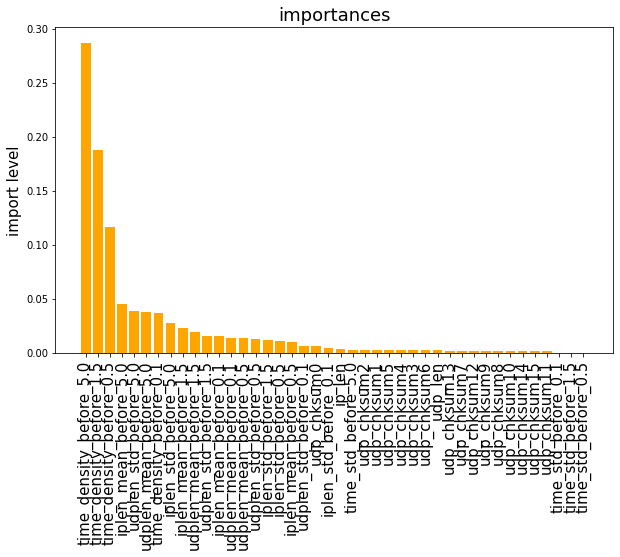

In [142]:
threshold = 0.01
x_selected = x_train[:, importances > threshold]
plt.figure(figsize=(10, 6))
plt.title("importances", fontsize=18)
plt.ylabel("import level", fontsize=15, rotation=90)
plt.rcParams['axes.unicode_minus'] = False
for i in range(42):
    plt.bar(i, importances[indices[i]], color='orange', align='center')
    plt.xticks(np.arange(x_columns.shape[0]), x_columns_indices, rotation=90, fontsize=15)
plt.show()

In [111]:
accuracy_score(y_test, y_pred)

0.9794786466999446

In [112]:
confusion_matrix(y_test, y_pred)

array([[   24,     0,     0,     0,     0,     1,     0,     0],
       [    2,  6695,     3,     0,     0,     0,    13,   115],
       [    0,     0, 17345,     1,     0,     2,     0,     0],
       [    0,     0,     0,   278,    41,    34,     0,     0],
       [    0,     0,     0,    43,   267,    27,     0,     0],
       [    0,     0,     0,    34,    41,   213,     0,     0],
       [    0,     5,    10,     0,     0,     0, 26940,     2],
       [    2,   716,     0,     0,     0,     0,    18,  1218]])

---
> 

In [113]:
from sklearn.naive_bayes import GaussianNB

In [114]:
modelb = GaussianNB()
modelb.fit(x_train1, y_train1)

GaussianNB(priors=None, var_smoothing=1e-09)

In [115]:
y_pred1 = modelb.predict(x_test1)

In [116]:
accuracy_score(y_test1, y_pred1)

0.9364207801811795

In [117]:
confusion_matrix(y_test1, y_pred1)

array([[   27,     0,     0,     0,     0,     0,     0,     0],
       [    5,  6455,   181,     0,     0,     1,    48,   138],
       [   12,   281, 16962,     0,     0,     1,     0,    80],
       [    4,     0,     0,   154,   142,    77,     0,     0],
       [    3,     0,     0,   101,   178,    79,     0,     0],
       [   18,     0,     0,   111,   103,    71,     0,     0],
       [    8,    11,   127,     0,     0,     2, 26480,   220],
       [    3,  1462,    57,     0,     0,     0,   164,   324]])

---

In [118]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train1, y_train1)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [119]:
y_pred1 = model.predict(x_test1)

In [120]:
accuracy_score(y_test1, y_pred1)

0.947772231466075

---
> Sequential Model_Softmax multi-classification based on multilayer perceptron

In [121]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD


model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
model.add(Dense(64, activation='relu', input_dim=42))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(9, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [122]:
y_train_h = keras.utils.to_categorical(y_train1, num_classes=9)
y_test_h = keras.utils.to_categorical(y_test1, num_classes=9)

In [123]:
model.fit(x_train1, y_train_h,
          epochs=100,
          batch_size=35)

Epoch 1/100
6182/6182 [==============================] - 7s 1ms/step - loss: 0.3326 - accuracy: 0.8978
Epoch 2/100
6182/6182 [==============================] - 6s 1ms/step - loss: 0.2093 - accuracy: 0.9334
Epoch 3/100
6182/6182 [==============================] - 6s 1ms/step - loss: 0.1976 - accuracy: 0.9354
Epoch 4/100
6182/6182 [==============================] - 6s 1ms/step - loss: 0.1895 - accuracy: 0.9364
Epoch 5/100
6182/6182 [==============================] - 7s 1ms/step - loss: 0.1823 - accuracy: 0.9375
Epoch 6/100
6182/6182 [==============================] - 7s 1ms/step - loss: 0.1756 - accuracy: 0.9391
Epoch 7/100
6182/6182 [==============================] - 6s 1ms/step - loss: 0.1731 - accuracy: 0.9398
Epoch 8/100
6182/6182 [==============================] - 7s 1ms/step - loss: 0.1710 - accuracy: 0.9399
Epoch 9/100
6182/6182 [==============================] - 7s 1ms/step - loss: 0.1673 - accuracy: 0.9410
Epoch 10/100
6182/6182 [==============================] - 7s 1ms/step - l

In [124]:
score = model.evaluate(x_test1, y_test_h, batch_size=35)

1546/1546 [==============================] - 1s 875us/step - loss: 0.1234 - accuracy: 0.9464


---
> Anomaly Detection

In [156]:
anormaldata, normaldata = [x for _, x in data.groupby(data['device'] > 0)]

*isolation forest

In [138]:
from sklearn.ensemble import IsolationForest

In [209]:
features = x_columns[indices[0:5]]

In [210]:
normaldata_det = normaldata[features]
anormaldata_det = anormaldata[features]
normaldata_det.describe()

,time_density_before_5.0,time_density_before_1.5,time_density_before_0.5,iplen_mean_before_5.0,udplen_std_before_5.0
count,270309.000000,270309.000000,270309.000000,270309.000000,270309.000000
mean,140.258186,42.541288,14.647071,38.283117,5.763704
std,55.383040,16.845523,5.938165,2.408127,4.188175
min,1.000000,1.000000,1.000000,32.000000,0.000000
25%,101.000000,32.000000,10.000000,38.000000,5.000000
50%,153.000000,47.000000,16.000000,39.000000,6.000000
75%,186.000000,57.000000,19.000000,39.000000,7.000000
max,219.000000,72.000000,35.000000,129.000000,241.000000


In [211]:
#normaldata_train, normaldata_test = train_test_split(normaldata, test_size = 0.1)
normaldata_train, normaldata_test = train_test_split(normaldata_det, test_size = 0.1)
len(normaldata_test)

27031

In [212]:
test = IsolationForest(random_state=0).fit(normaldata_train)

In [213]:
#isanormal = test.predict(anormaldata)
isanormal = test.predict(anormaldata_det)
isanormal

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1])

In [214]:
rate0 = np.sum(isanormal == -1)/len(isanormal)
print('The discrimination rate of abnormal data: %f'%rate0)

The discrimination rate of abnormal data: 1.000000


In [215]:
isnormal = test.predict(normaldata_test)
isnormal

array([-1, -1,  1, ...,  1,  1,  1])

In [216]:
rate = np.sum(isnormal == -1)/len(isnormal)
print('The misjudgment rate of normal data： %f'%rate)

The misjudgment rate of normal data： 0.220747


In [222]:
rate0 = []
rate = []
for i in range(1,30,2):
   print('%d begins'%i)
   features = x_columns[indices[0:i]]
   normaldata_det = normaldata[features]
   anormaldata_det = anormaldata[features]
   normaldata_train, normaldata_test = train_test_split(normaldata_det, test_size = 0.1)
   test = IsolationForest(random_state=0).fit(normaldata_train)
   isanormal = test.predict(anormaldata_det)
   rate0.append(np.sum(isanormal == -1)/len(isanormal))
   isnormal = test.predict(normaldata_test)
   rate.append(np.sum(isnormal == -1)/len(isnormal))

1 begins
3 begins
5 begins
7 begins
9 begins
11 begins
13 begins
15 begins
17 begins
19 begins
21 begins
23 begins
25 begins
27 begins
29 begins


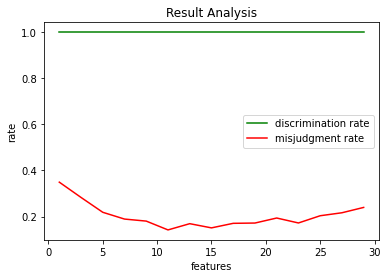

In [223]:
plt.title('Result Analysis')
plt.plot(range(1,30,2), rate0, color='green', label='discrimination rate')
plt.plot(range(1,30,2), rate, color='red', label='misjudgment rate')

plt.legend() 

plt.xlabel('features')
plt.ylabel('rate')
plt.show()

In [225]:
print('%d features is the best with misjudgement rate %0.1f'%(2*rate.index(min(rate))+1,min(rate)))

11 features is the best with misjudgement rate 0.1


---
> Hash

In [ ]:
datahash = cap[['device', 'ip_len', 'ip_ttl', 'udp_len']]

In [ ]:
def bin(x):
  digits = str('{0:016b}'.format(x))
  return digits

In [ ]:
def hash(s):
  shash = s[:3]
  return shash

In [ ]:
datahash = datahash.join(pd.DataFrame(cap["ip_chksum"].apply(bin).astype(str).str.findall("....").values.tolist()).add_prefix('ip_chksum'))
datahash = datahash.join(pd.DataFrame(cap["udp_chksum"].apply(bin).astype(str).str.findall("....").values.tolist()).add_prefix('udp_chksum'))
datahash.head()

,device,ip_len,ip_ttl,udp_len,ip_chksum0,ip_chksum1,ip_chksum2,ip_chksum3,udp_chksum0,udp_chksum1,udp_chksum2,udp_chksum3
0,10,48,41,28,1000,0100,0111,0100,1010,0110,0100,0100
0,13,38,36,18,1000,0100,0111,0100,1010,0110,0100,0100
0,13,38,36,18,1000,0100,0111,0100,1010,0110,0100,0100
0,10,48,44,28,1000,0100,0111,0100,1010,0110,0100,0100
0,11,32,63,12,1000,0100,0111,0100,1010,0110,0100,0100


In [ ]:
for col in ['ip_chksum0',	'ip_chksum1',	'ip_chksum2',	'ip_chksum3',	'udp_chksum0',	'udp_chksum1',	'udp_chksum2',	'udp_chksum3']:
  datahash[col] = datahash[col].apply(hash)
datahash.head()

,device,ip_len,ip_ttl,udp_len,ip_chksum0,ip_chksum1,ip_chksum2,ip_chksum3,udp_chksum0,udp_chksum1,udp_chksum2,udp_chksum3
0,10,48,41,28,100,010,011,010,101,011,010,010
0,13,38,36,18,100,010,011,010,101,011,010,010
0,13,38,36,18,100,010,011,010,101,011,010,010
0,10,48,44,28,100,010,011,010,101,011,010,010
0,11,32,63,12,100,010,011,010,101,011,010,010


In [ ]:
datahash.reset_index(drop=True)
datahash = datahash.astype(int)
datahash.describe()

,device,ip_len,ip_ttl,udp_len,ip_chksum0,ip_chksum1,ip_chksum2,ip_chksum3,udp_chksum0,udp_chksum1,udp_chksum2,udp_chksum3
count,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000
mean,12.170684,38.765459,46.601073,18.765459,16.664191,7.245658,96.336110,85.634553,55.790946,58.514906,50.257174,60.541986
std,1.048580,7.477088,13.105836,7.477088,23.265596,26.171932,23.525262,41.121476,50.234023,49.586884,50.424019,49.552130
min,1.000000,32.000000,36.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,38.000000,36.000000,18.000000,11.000000,0.000000,101.000000,100.000000,1.000000,10.000000,1.000000,10.000000
50%,13.000000,38.000000,36.000000,18.000000,11.000000,0.000000,101.000000,101.000000,100.000000,100.000000,11.000000,100.000000
75%,13.000000,40.000000,63.000000,20.000000,11.000000,0.000000,101.000000,110.000000,101.000000,101.000000,101.000000,101.000000
max,14.000000,748.000000,114.000000,728.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
